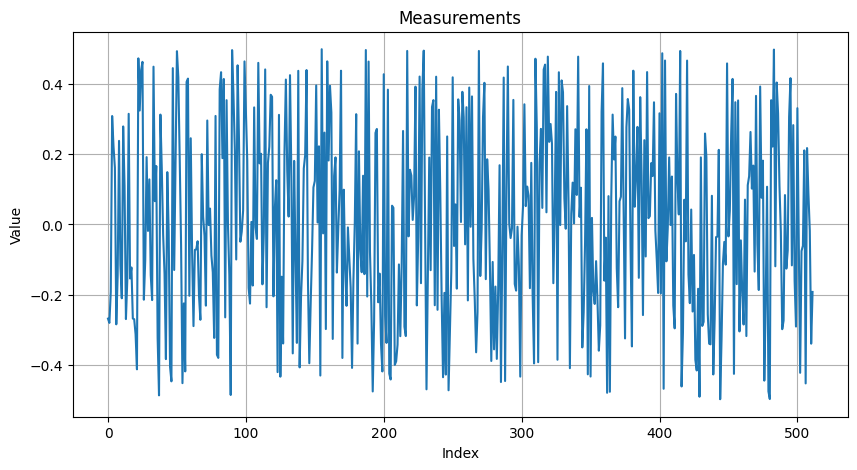

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import requests

url = "http://theory.tifr.res.in/~kulkarni/noise.txt"
response = requests.get(url)
data = np.array([float(x) for x in response.text.strip().split('\n')])



# Plot the measurements
plt.figure(figsize=(10, 5))
plt.plot(data ,marker='', linestyle='-', markersize=5)
plt.title('Measurements')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

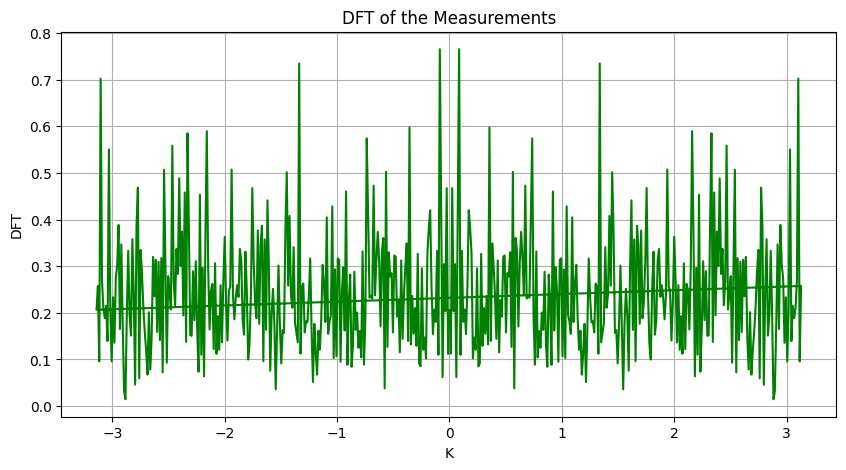

In [10]:
x_min=1
num_points = len(data)
dx = 1
k_arr = (2 * np.pi * np.fft.fftfreq(num_points, dx))

#Compute the Discrete Fourier Transform (DFT)
nft=np.fft.fft(data,norm='ortho')
k_array=np.fft.fftfreq(num_points, dx)

# Plot the DFT of the measurements
plt.figure(figsize=(10, 5))
plt.plot(k_arr, np.abs(nft), marker='', linestyle='-', markersize=5, color = 'g')
plt.title('DFT of the Measurements')
plt.xlabel('K')
plt.ylabel('DFT')
plt.grid(True)
plt.show()

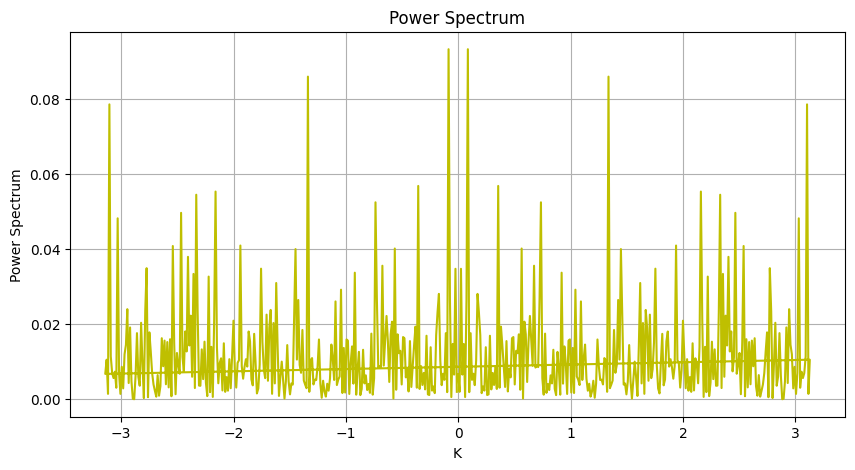

In [11]:

factor=np.exp(-1j*k_arr*x_min)
aft=dx*np.sqrt(num_points/(2*np.pi))*factor*nft

# Calculate the power spectrum using the periodogram method
power_spectrum = (np.abs(aft)**2)/num_points

plt.figure(figsize=(10, 5))
plt.plot(k_arr, power_spectrum, marker='', linestyle='-',color='y')
plt.title('Power Spectrum')
plt.xlabel('K')
plt.ylabel('Power Spectrum')
plt.grid(True)
plt.show()

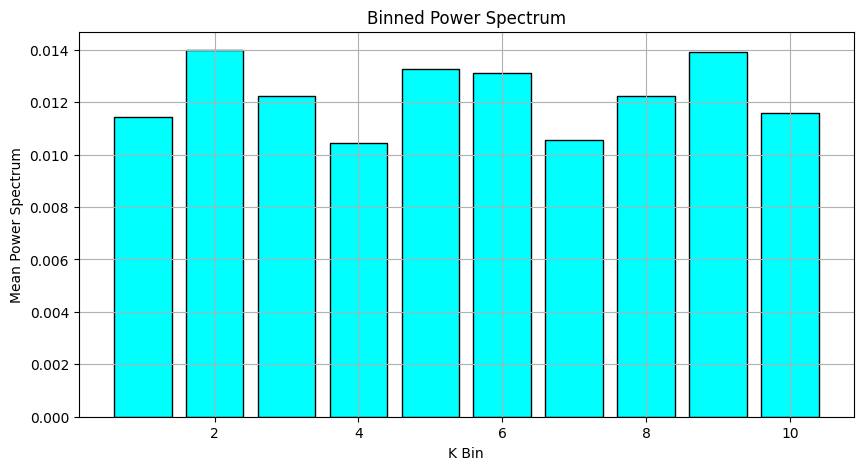

In [12]:

# Binning the power spectrum into ten k bins
num_bins = 10
bin_edges = np.linspace(np.min(k_arr), np.max(k_arr), num_bins + 1)
bin_indices = np.digitize(k_arr, bin_edges)
binned_power_spectrum = np.zeros(num_bins)

for i in range(num_bins):
    indices_in_bin = np.where(bin_indices == i+1)[0]
    binned_power_spectrum[i] = np.mean(power_spectrum[indices_in_bin])

# Plotting the binned power spectrum
plt.figure(figsize=(10, 5))
plt.bar(range(1, num_bins + 1), binned_power_spectrum, color='cyan', edgecolor='black')
plt.title('Binned Power Spectrum')
plt.xlabel('K Bin')
plt.ylabel('Mean Power Spectrum')
plt.grid(True)
plt.show()
